In [0]:
#Installing the dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #ML dependency that contains lots of ML libraries.
from sklearn.svm import SVR #SupportVectorRegressor
import matplotlib.pyplot as plt

In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('NFLX.csv')
df.head(7)

Saving NFLX.csv to NFLX.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-01,415.100006,427.970001,411.730011,415.269989,415.269989,8299900
1,2020-05-04,417.779999,428.540009,414.869995,428.149994,428.149994,7799100
2,2020-05-05,427.559998,431.000000,421.559998,424.679993,424.679993,6286300
3,2020-05-06,429.299988,439.769989,426.390015,434.260010,434.260010,6660700
4,2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900
5,2020-05-08,434.140015,442.000000,433.640015,435.549988,435.549988,5054300
6,2020-05-11,436.329987,444.890015,435.559998,440.519989,440.519989,5480300


In [0]:
#Create the lists X and Y data sets
dates = []
prices = []

In [0]:
#Get the number of rows and columns in the data set
df.shape

(20, 7)

In [0]:
#Displaying Last row
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2020-05-29,417.459991,420.299988,411.850006,419.730011,419.730011,5254900


In [0]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-01,415.100006,427.970001,411.730011,415.269989,415.269989,8299900
1,2020-05-04,417.779999,428.540009,414.869995,428.149994,428.149994,7799100
2,2020-05-05,427.559998,431.000000,421.559998,424.679993,424.679993,6286300
3,2020-05-06,429.299988,439.769989,426.390015,434.260010,434.260010,6660700
4,2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900
5,2020-05-08,434.140015,442.000000,433.640015,435.549988,435.549988,5054300
6,2020-05-11,436.329987,444.890015,435.559998,440.519989,440.519989,5480300
7,2020-05-12,442.000000,444.170013,431.359985,431.820007,431.820007,4598200
8,2020-05-13,435.690002,447.000000,427.269989,438.269989,438.269989,7014600
9,2020-05-14,444.899994,452.380005,432.820007,441.950012,441.950012,9007500


In [0]:
#To check whether the last row is omitted or not
df.shape

(19, 7)

In [0]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
#Printing all the dates in the updated date list
print(df_dates)

0     2020-05-01
1     2020-05-04
2     2020-05-05
3     2020-05-06
4     2020-05-07
5     2020-05-08
6     2020-05-11
7     2020-05-12
8     2020-05-13
9     2020-05-14
10    2020-05-15
11    2020-05-18
12    2020-05-19
13    2020-05-20
14    2020-05-21
15    2020-05-22
16    2020-05-26
17    2020-05-27
18    2020-05-28
Name: Date, dtype: object


In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
print(dates)

[[1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [26], [27], [28], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [26], [27], [28]]


In [0]:
def predict_prices(dates, prices, x):
  
  #Creaing the 3 SVR models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Training the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Creating the Linear Regression model
  lin_reg = LinearRegression()
  #Training the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

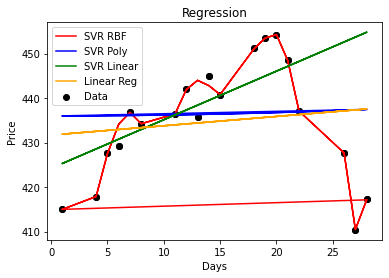

(430.0405776149167, 434.0449745000084, 436.1569671537676, 433.5758165592777)


In [0]:
#Predict the price of Apple on 09 April
predicted_price = predict_prices(dates, prices, [[9]])
print(predicted_price)